In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.filters.hp_filter import hpfilter

In [4]:
df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

<AxesSubplot:>

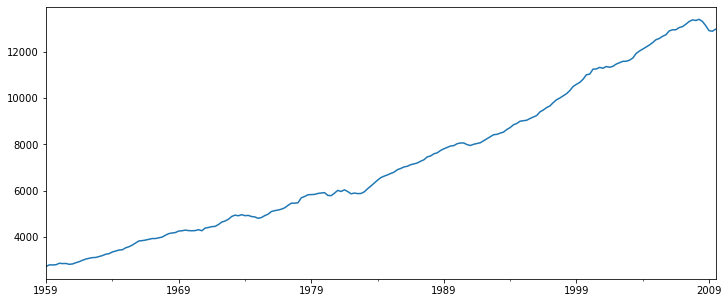

In [7]:
df['realgdp'].plot(figsize=(12,5))

In [16]:
gdp_cycle, gdp_trend= hpfilter(df['realgdp'], 1600)

<AxesSubplot:>

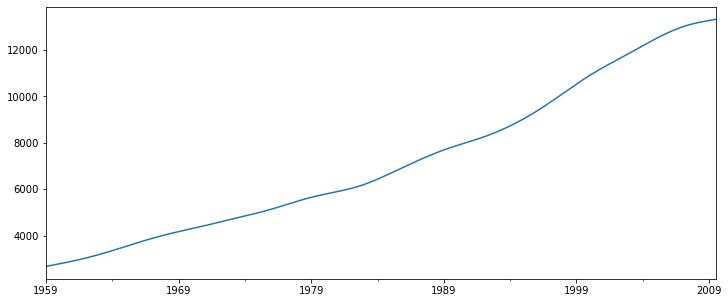

In [17]:
gdp_trend.plot(figsize=(12,5))

<AxesSubplot:>

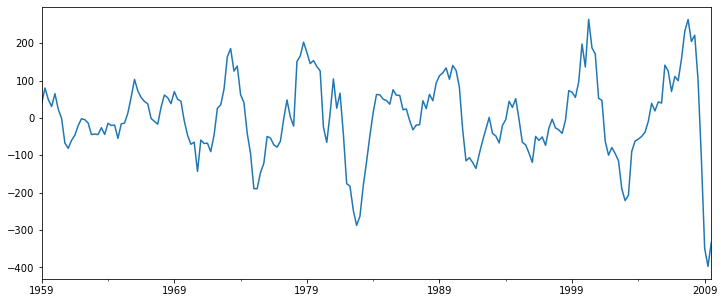

In [18]:
gdp_cycle.plot(figsize=(12,5))

In [19]:
df['trend'] = gdp_trend

<AxesSubplot:>

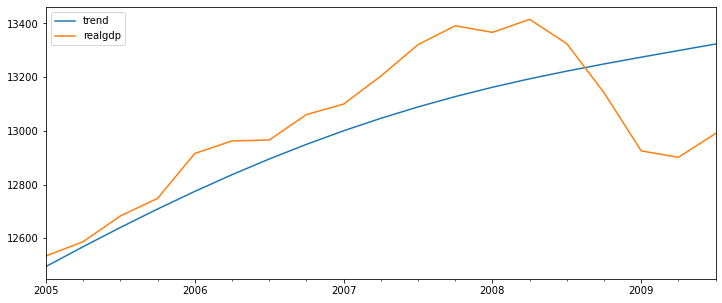

In [22]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

# ETS Decomposition (Error-Trend-Seasonality)

In [26]:
df = pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)

In [29]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
df.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

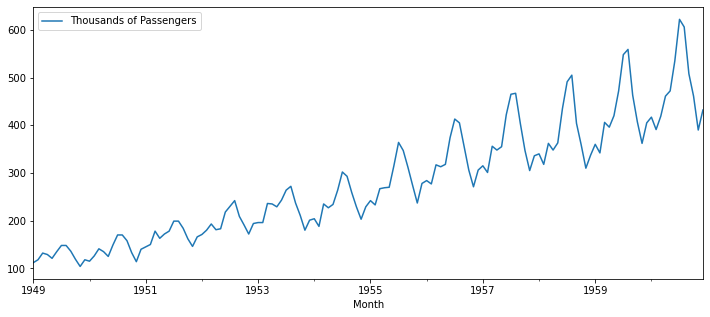

In [31]:
df.plot(figsize=(12,5))

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
results = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

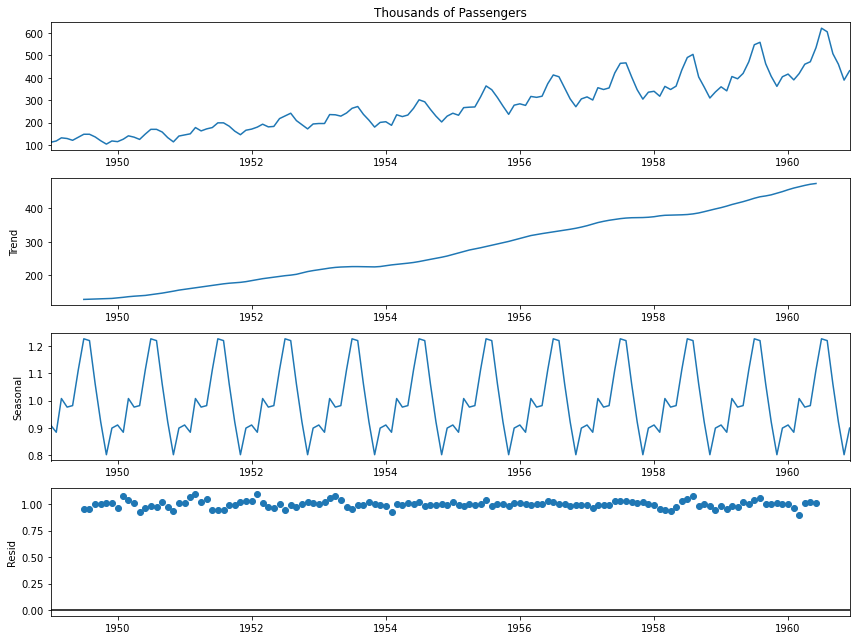

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,9)

results.plot();

# EWMA (Exponentially Weighted Moving Average)

In [53]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

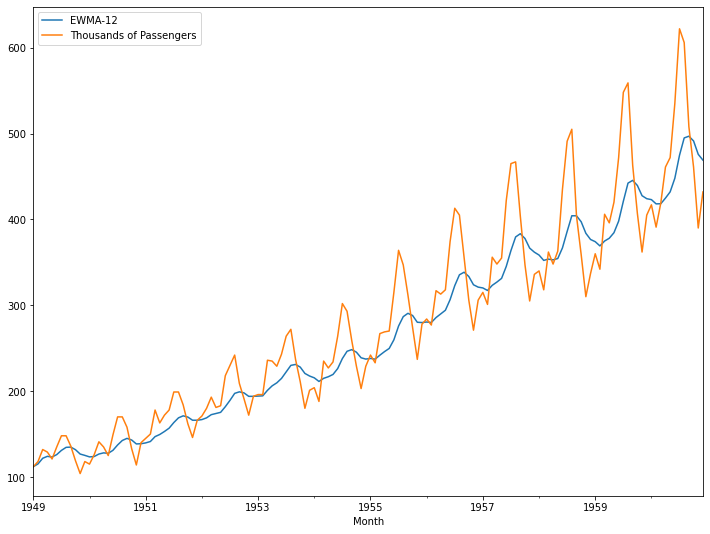

In [54]:
df[['EWMA-12', 'Thousands of Passengers']].plot()

# Holt-Winters Methods 


In [55]:
df.index.freq ='MS'

In [56]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [59]:
span = 12
alpha = 2/(span+1)

In [72]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [73]:
df['EWMA-12']

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01    469.053629
Freq: MS, Name: EWMA-12, Length: 144, dtype: float64

In [74]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [75]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [76]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [79]:
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

<AxesSubplot:xlabel='Month'>

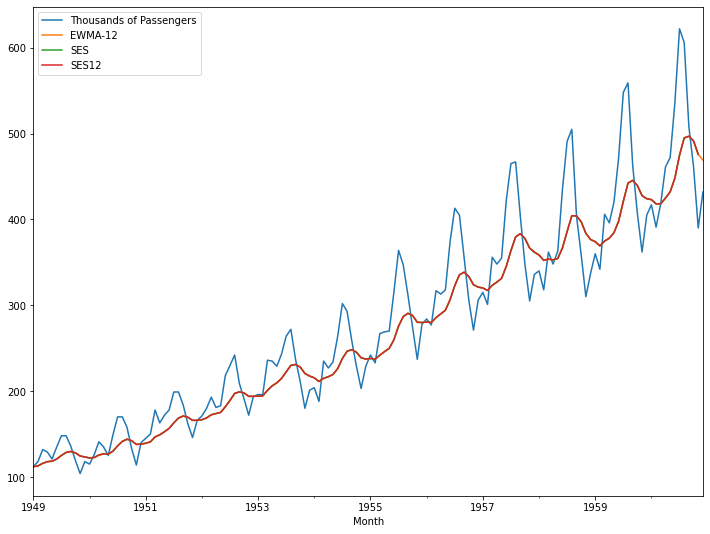

In [80]:
df.plot()

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [85]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [86]:
df.head()

,Thousands of Passengers,EWMA-12,SES,SES12,DES_add_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,118.359861,123.110263


<AxesSubplot:xlabel='Month'>

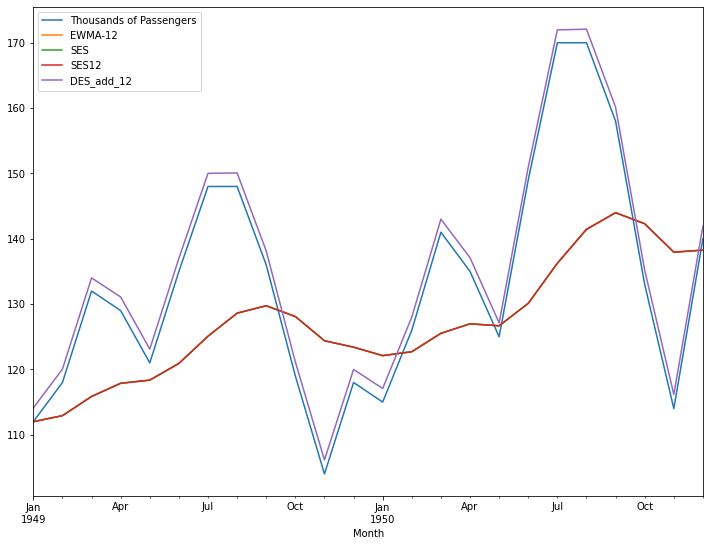

In [88]:
df.iloc[:24].plot()

In [89]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

<AxesSubplot:xlabel='Month'>

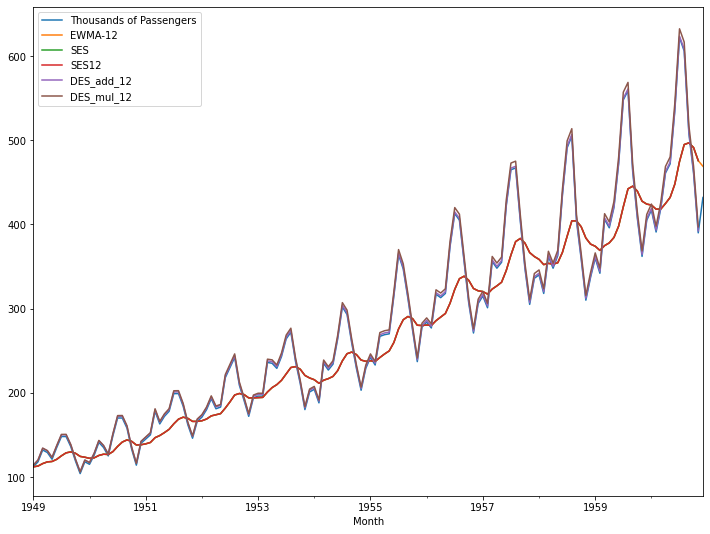

In [91]:
df.plot()

In [101]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\davide.filosa.ext\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

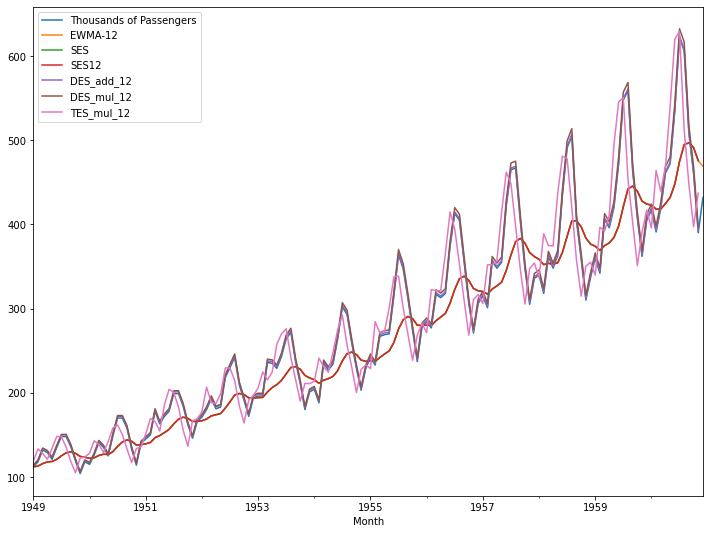

In [102]:
df.plot()

In [103]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

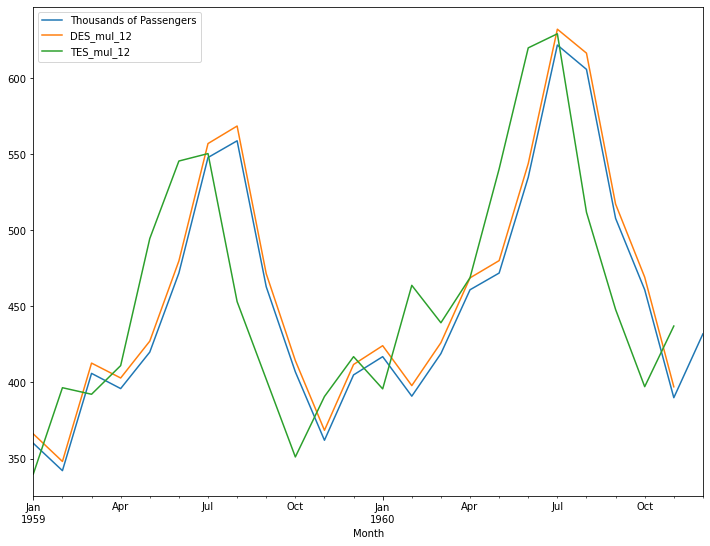

In [104]:
df[['Thousands of Passengers',
       'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot()